# Plotting data

Text(0, 0.5, 'Average PPG')

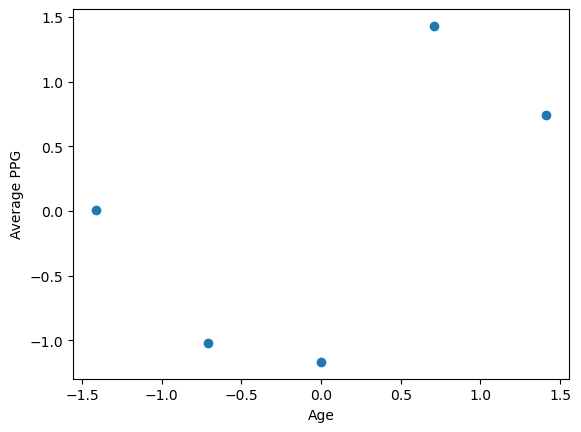

In [169]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data set
# x_train = np.array([28, 29, 30, 31, 32])  # Years in the league
# y_train = np.array([19.0, 20.5, 23.3, 23.8, 25.7])  # Points per game

df = pd.read_csv('all_seasons.csv')

player_df = df[df['player_name'] == 'LeBron James']
# print(player_df)
yrs = player_df['age'].values[-5:]
pts = player_df['pts'].values[-5:]

x_train = np.array(yrs)
y_train = np.array(pts)

x_train = (x_train - np.mean(x_train)) / np.std(x_train)
y_train = (y_train - np.mean(y_train)) / np.std(y_train)

plt.plot(x_train, y_train, 'o')
plt.xlabel('Age')
plt.ylabel('Average PPG')



    


# Compute cost function

In [143]:
def compute_cost(x_train, y_train, w, b):
    m = x_train.shape[0]
    cost_sum = 0

    prediction = []

    for i in range(m):
        fwb = w * x_train[i] + b
        cost = (fwb - y_train[i]) ** 2
        # print(cost)
        cost_sum += cost
        
    total_cost = cost_sum / (2 * m)

    # print(total_cost)
    
    return total_cost
    

# Compute gradient function

In [135]:
def compute_gradient(x_train, y_train, w, b):
    m = x_train.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        wd = ((w * x_train[i] + b) - y_train[i]) * x_train[i]
        dj_dw += wd
        
        bd = ((w * x_train[i] + b) - y_train[i])
        dj_db += bd
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

# Compute gradient descent function

In [182]:
def compute_gradient_descent(x_train, y_train, w, b, a):
    
    while True:
        cost = compute_cost(x_train, y_train, w, b)
        if cost < 0.4:
            print('final cost:', cost)
            break
        
        dj_wb, dj_db = compute_gradient(x_train, y_train, w, b)
        w = w - a * dj_wb
        b = b - a * dj_db
    
    return w, b

# Plot prediction

final cost: 0.3990883068711259


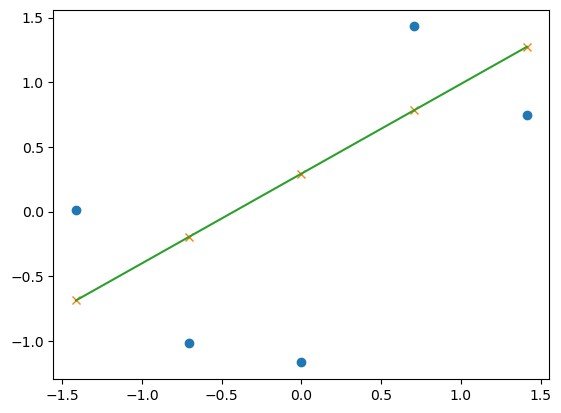

In [183]:
w = 10
b = 20
a = 0.01

w, b = compute_gradient_descent(x_train, y_train, w, b, a)

prediction = []

for i in range (x_train.shape[0]):
    fwb = w * x_train[i] + b
    prediction.append(fwb)
    
y_pred = np.array(prediction)

plt.plot(x_train, y_train, 'o')
plt.plot(x_train, y_pred, 'x')
plt.plot(x_train, y_pred)
